In [11]:
import numpy as np
import random
from matplotlib import pyplot as plt 

In [12]:
def init_k_center(k,dim):
    # 随机生成k个点作为初始的中心点
    random_array = np.random.rand(k, dim)
    print('init',k,'random center point...')
    return random_array

In [13]:
def distance(a, b):
    # 计算两点的欧式距离
    dist = np.sqrt(np.sum(np.square(a - b)))
    #dist = np.linalg.norm(a - b)
    return dist

In [14]:
def find_closest_center(center_array, point):
    # 寻找最近的中心点
    k = len(center_array)
    dist = []
    for i in range(k):
        dist.append(distance(center_array[i], point))
    dist = np.array(dist).argsort()
    return dist[0]

In [15]:
def update_k_center(center_array, dataset, mark_array):
    # 更新中心点为簇的中心位置
    k = len(center_array)
    for i in range(k):
        tmp_array = []
        for j in range(len(dataset)):
            if mark_array[j] == i:
                tmp_array.append(dataset[j])
        tmp_array = np.array(tmp_array)
        #center_array[i] = np.mean(tmp_array, axis=0)     
        center_array[i] = tmp_array.mean(0) 

In [16]:
def k_means(k, dataset, iter_num):
    dataset_size = dataset.shape[0]
    dataset_dim = dataset.shape[1]
    center_array = init_k_center(k,dataset_dim)
    for _ in range(iter_num):
        print('iter_num : ', _)
        mark_array = np.zeros(shape=(dataset_size,1))
        for i in range(dataset_size):
            mark_array[i] = find_closest_center(center_array, dataset[i])
        update_k_center(center_array, dataset, mark_array)
        draw_result(dataset, mark_array,center_array)

In [17]:
def draw_result(dataset, mark_array, center_array):
    # 绘制聚类结果图
    color = ['b','g','r','c','m','y','k','w']
    plt.title("k-means") 
    plt.xlabel("x axis caption") 
    plt.ylabel("y axis caption")
    for i in range(len(center_array)):
        plt.plot(center_array[i][0],center_array[i][1],"*",color = color[i]) 
    for i in range(len(dataset)):
        plt.plot(dataset[i][0],dataset[i][1],"ob",color= color[int(mark_array[i])]) 
    plt.show()

init 3 random center point...
iter_num :  0


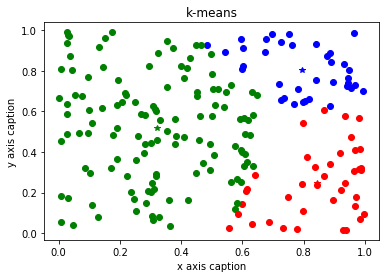

iter_num :  1


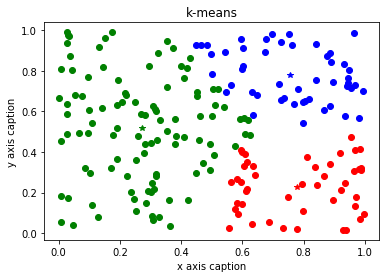

iter_num :  2


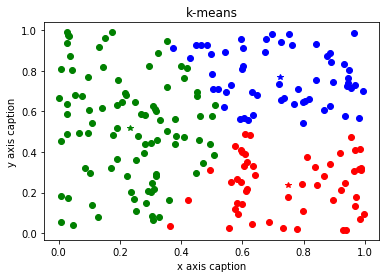

iter_num :  3


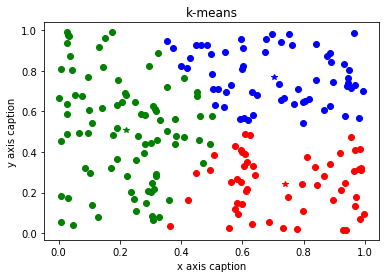

iter_num :  4


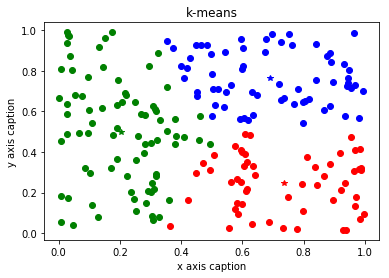

In [18]:
dataset = np.random.rand(200, 2)
k_means(3, dataset,5)